# Module 13: Logistic Regression
***
Logistic regression is a type of regression analysis used to determine the probability of a certain event/outcome occuring.

Unlike linear regression, logistic regression predicts if an outcome is "present or absent", instead of predicting a numeric continuous outcome like "grade". Logistic regression is best used for situations where you have a <b>binary dependent variable</b> - this means there are only two groups (i.e., passed and failed). 

With logistic regression, you can determine the probability of a specific outcome, given your chosen independent variables. 

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

###

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color=#088A68>Dataset Features</font>
***
The diabetes dataset captures demographic information for several individuals, including if they have a type 2 diabetes diagnosis. Specific variables include:

* <b>Pregnancies</b>: Number of times pregnant
* <b>Glucose</b>: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* <b>BloodPressure</b>: Diastolic blood pressure (mm Hg)
* <b>SkinThickness</b>: Triceps skin fold thickness (mm)
* <b>Insulin</b>: 2-Hour serum insulin (mu U/ml)
* <b>BMI</b>: Body mass index (weight in kg/(height in m)2)
* <b>DiabetesPedigreeFunction</b>: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* <b>Age</b>: Age (years)
* <b>Outcome</b>: Class variable (0 if non-diabetic, 1 if diabetic)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## <font color=#088A68>Relationship between Dependent and Independent Variables</font>
***
Establishing the relationship between the dependent variable and the independent variables is important when you are choosing which variables to include in your logistic regression model. Use the <b>groupby function</b> to determine the differences in the average value for your continuous variables grouped by outcome.

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

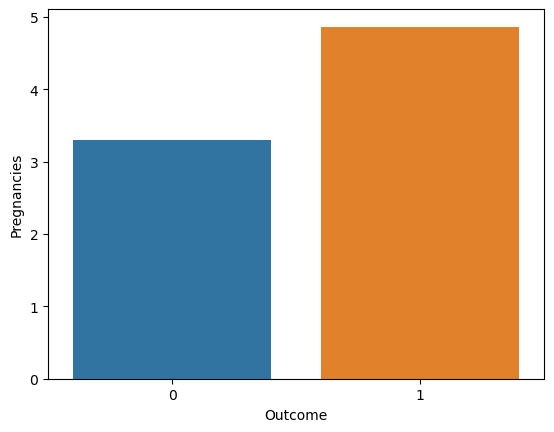

In [3]:
print(df["Pregnancies"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "Pregnancies", ci = None)

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

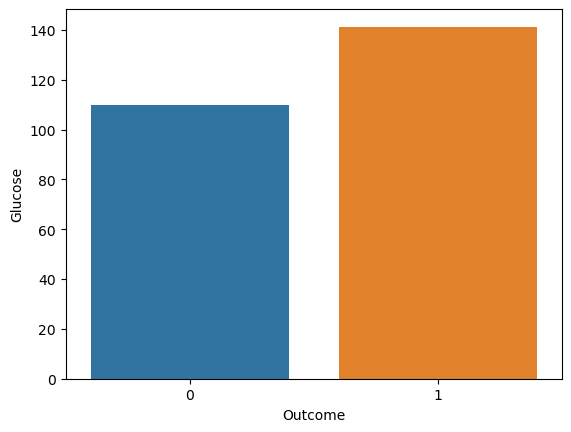

In [4]:
print(df["Glucose"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "Glucose", ci = None)

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

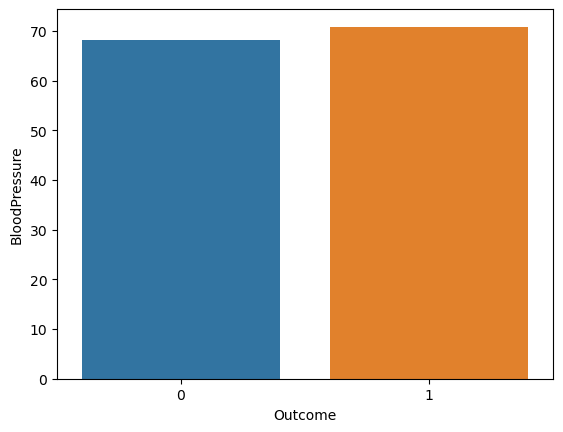

In [5]:
print(df["BloodPressure"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "BloodPressure", ci = None)

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

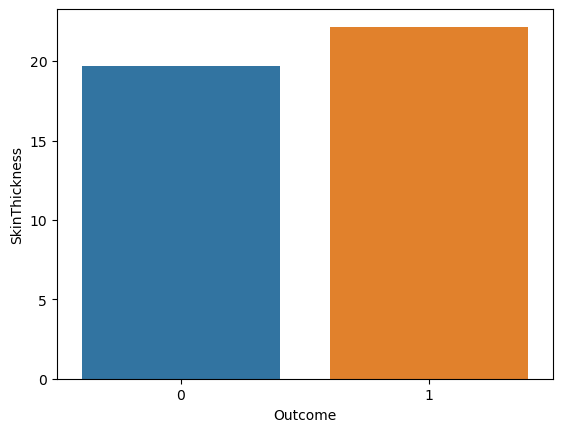

In [6]:
print(df["SkinThickness"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "SkinThickness", ci = None)

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

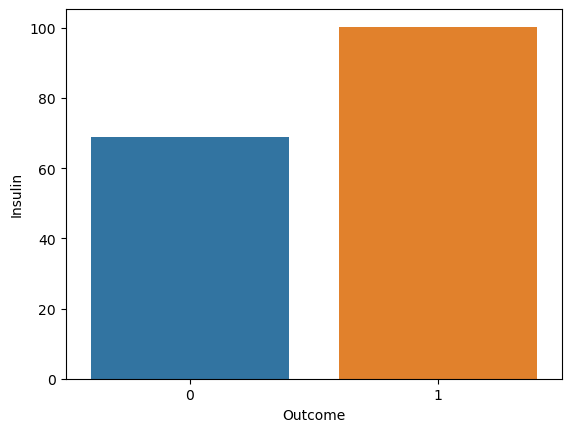

In [7]:
print(df["Insulin"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "Insulin", ci = None)

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

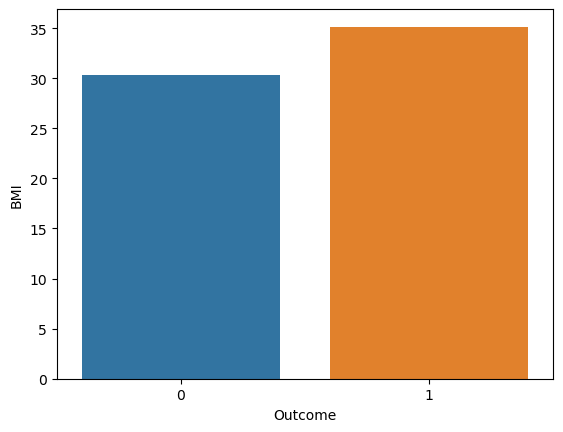

In [8]:
print(df["BMI"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "BMI", ci = None)

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

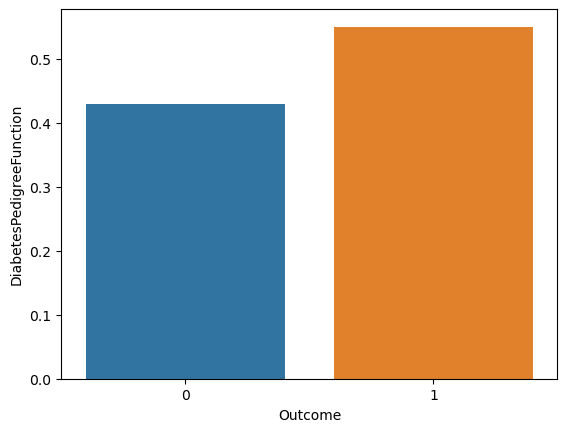

In [9]:
print(df["DiabetesPedigreeFunction"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "DiabetesPedigreeFunction", ci = None)

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

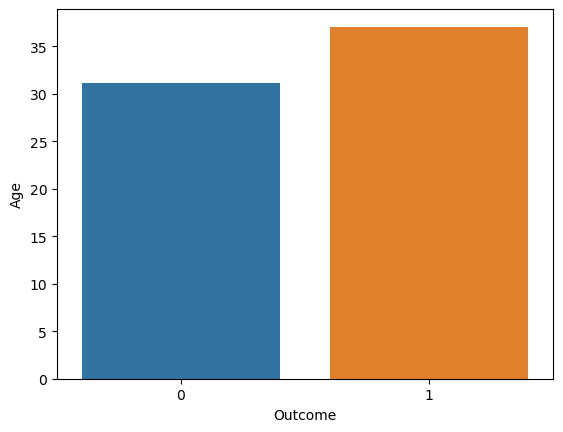

In [10]:
print(df["Age"].groupby(df["Outcome"]).mean())

###

sns.barplot(data = df, x = "Outcome", y = "Age", ci = None)

## <font color=#DF7401>Skills Check</font>
***
* What is the main difference between Linear Regression and Logistic Regression?

In [ ]:
# Linear Regression is a supervised learning technique for solving regression problems
# Used for predicting continuous dependent values with the help of independent variables 
# Output can only be continuous values such as age, height, time, price, salary, etc.
# We find a best fit linear line which will predict the next value or variable
# Estimation accuracy Least square method
# Variable relationship Relationship between dependent and independent variable should be linear
# Collinearity between independent variables is allowed
# Applications - Used in businesses and forecasting stocks

In [ ]:
# Logistic Regression a supervised learning technique that is mainly used in the classification of problems
# Used for binary classification or separation of discreet dependent values with the help of independent variables
# The output can only be between 0 and 1.
# We find a s-curve or sigmoid curve which classify the variables
# Estimation accuracy Maximum likelihood estimation method
# Variable relationship Relationship between dependent and independent variable is not required
# Collinearity between independent variables is not allowed
# Applications - Used in classification and image processing

## <font color=#088A68>Preparing the Logistic Regression Model</font>
***
Creating a logistic regression model and fitting your data is very similar to creating a linear regression model. Before this point, make sure you have a strong understanding of which variables you want to include, what your dependent variable is, and how your dependent variable is coded.

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

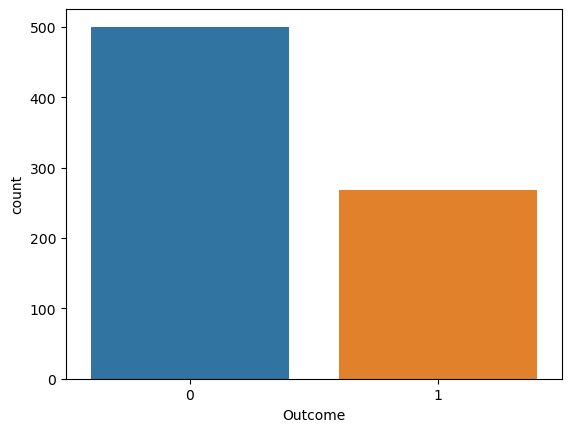

In [11]:
## check the coding of the dependent variable
## the value coded as "1" should represent to the presence of the event

###

print(df["Outcome"].value_counts())

###

sns.countplot(data = df, x = "Outcome")

### <font color=#088A68>The Logistic Regression Model</font>
***
Logistic regression is a statistical method for predicting a categorical outcome. The outcome or target variable is binary meaning there are only two options. It calculates the probability of an event occurrence.

In [12]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('Outcome ~ Pregnancies + Glucose + Insulin + BMI + DiabetesPedigreeFunction + Age', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.475344
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.2651
Time:                        18:44:36   Log-Likelihood:                -365.06
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.724e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.8442      0.704    -12.557      0.000     -10.225      -7.464
Pregnancies                  0.1177      0.032      3.705      0.000       0.055       0.180
Glucose                      0.0347      0.004      9.540      0.000       0.028       0.042
Insulin                     -0.0012      0.001     -1.545      0.122      -0.003       0.000
BMI                          0.0822      0.014      5.871      0.000       0.055       0.110
DiabetesPedigreeFunction     0.9467      0.295      3.204      0.001       0.368       1.526
Age                          0.0108      0.009      1.178      0.239      -0.007       0.029
============================================================================================
"""

## <font color=#088A68>Logistic Regression Model Results</font>

***

The interpretation of logistic regression results is very different from the linear regression model. However, there are many items that are similar - including the <i>p-value</i> which shows statistical significance of the variable within the model. 

***
### <font color=#DF7401>Model Fit & Significance</font>

The <b>LLR p-value</b> provides the results of a significance test for the overall logistic regression model. If the p-value meets the cut-off for statistical significance, we can conclude the model fits the data well. The p-value is written in scientific notation - if you want to quickly convert this number, use the following link: https://www.calculator.net/scientific-notation-calculator.html 

***
### <font color=#DF7401>Coefficient Interpretations</font>

The variable coefficients are listed similarly as they are with linear regression - but the <b>interpretation is not the same!</b> For example, the coef value for Glucose is 0.034670, which means that for each one-unit increase in Glucose value, the log-odds of being diabetic increase by a factor of 0.034670. <b>This is not very intuitive or easy to report!</b> Instead, we can report Odds Ratios or Percent Change. 

In [13]:
## print just the variable coefficient values

mod1.params

Intercept                  -8.844177
Pregnancies                 0.117669
Glucose                     0.034670
Insulin                    -0.001248
BMI                         0.082235
DiabetesPedigreeFunction    0.946713
Age                         0.010758
dtype: float64

### <font color=#DF7401>Odds Ratio (OR)</font>

An Odds Ratio (OR) is a measure of association between an event and an outcome. The OR represents the odds that an outcome will occur given a specific event/exposure, compared to the odds of the outcome occuring without the event/exposure. We can convert our model coefficients to odds ratios which will be easier to interpret. 

    * OR > 1 indicates increased occurrence of an event
    * OR < 1 indicates decreased occurrence of an event 

In [14]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,0.000144,3.620603e-36,Sig
Pregnancies,1.124871,2.110039e-04,Sig
Glucose,1.035278,1.431546e-21,Sig
Insulin,0.998753,1.223019e-01,Not Sig
BMI,1.085711,4.330315e-09,Sig
DiabetesPedigreeFunction,2.577224,1.355630e-03,Sig
Age,1.010816,2.388123e-01,Not Sig


### Interpreting the Odds Ratios (OR)

***

    * OR > 1 : with each one-unit increase in X, the odds of << outcome >> increase by << odds ratio >>
    * OR < 1 : with each one-unit increase in X, the odds of << outcome >> decrease by << odds ratio >>
    
***

#### Pregnancies

With each additional pregnancy, the odds of developing diabetes increases by 1.12

#### Glucose

With each one-unit increase in fasting glucose level, the odds of developing diabetes increase by 1.04

#### Insulin (not sig.)

With each one-unit increase in insulin level, the odds of developing diabetes decrease by 0.999

#### BMI

With each one-unit increase in BMI, the odds of developing diabetes increase by 1.09

#### Diabetes Pedigree Score (DPS)

With each one-unit increase in Diabetes Pedigree Score, the odds of developing diabetes increase by 2.58

#### Age (not sig.)

For every one year increase in age, the odds of developing diabetes increase by 1.01

### <font color=#DF7401>Percent Change (PP)</font>

Once you calculate the OR for your given variables, you can use this value to provide a simplier explaination (using percentages) regarding how changes in your independent variables influence the dependent variable. Percentages are typically easier for people to understand and allow you to quickly determine the direction and magnitude of the relationship between your variables.    

    * PC > 0 indicates increased odds of an event
    * PC < 0 indicates decreased odds of an event 

In [15]:
## percent change = OR minus 1 multiplied by 100

df_odds["Pct Change"] = (df_odds["OR"] - 1) * 100

df_odds

,OR,pvalue,Sig,Pct Change
Intercept,0.000144,3.620603e-36,Sig,-99.985578
Pregnancies,1.124871,2.110039e-04,Sig,12.487123
Glucose,1.035278,1.431546e-21,Sig,3.527792
Insulin,0.998753,1.223019e-01,Not Sig,-0.124687
BMI,1.085711,4.330315e-09,Sig,8.571085
DiabetesPedigreeFunction,2.577224,1.355630e-03,Sig,157.722376
Age,1.010816,2.388123e-01,Not Sig,1.081604


### Interpreting the Percent Change (PC)

***

    * PC > 0 : with each one-unit increase in X, the odds of << outcome >> increase by << % change >>
    
    * PC < 0 : with each one-unit increase in X, the odds of << outcome >> decrease by << % change >>
    
***

#### Pregnancies

With each additional pregnancy, the odds of developing diabetes increases by 12.5%

#### Glucose

With each one-unit increase in fasting glucose level, the odds of developing diabetes increase by 3.5%

#### Insulin (not sig.)

With each one-unit increase in insulin level, the odds of developing diabetes decrease by 0.12%

#### BMI

With each one-unit increase in BMI, the odds of developing diabetes increase by 8.6%

#### Diabetes Pedigree Score (DPS)

With each one-unit increase in Diabetes Pedigree Score, the odds of developing diabetes increase by 157.7%

#### Age (not sig.)

For every one year increase in age, the odds of developing diabetes increase by 1.1%

## <font color=#DF7401>Skills Check</font>
__________________________________________________________

#### How would you interpret a categorical variable coefficient?

If gender was included in the model (reference: women), you could interpret the odds ratio and the percent change in the following way:

* The odds of developing diabetes increase by 1.03 (<b>odds ratio</b>) for men, when compared to women. The odds of developing diabetes increases by 180.1% (<b>pct change</b>) for men, when compared to women.

## <font color=#088A68>Logistic Regression Model Predictions</font>

***

Making predictions with our logistic regression results requires a few additional steps. We are interested in predicting the probability of a specific outcome. Instead of completing the calculations by hand, we can use the predict function and a dictionary to specify values and predict an outcome. 

***
#### <font color=#DF7401>Predicting the Outcome</font>

<b>Scenario</b>: 36-year old woman, 3 prior pregnancies , 117 fasting glucose, 67 Diastolic BP, 31 skin thickness, 23 insulin level, 39.1 body mass index, and 0.49 family pedigree score. What is the probability of this person being classified as diabetic given these characteristics?

In [16]:
mod1.predict({
    'Pregnancies': 3, 
    'Glucose': 117, 
    'BloodPressure': 67, 
    'SkinThickness': 31, 
    'Insulin': 23, 
    'BMI': 39.1, 
    'DiabetesPedigreeFunction': 0.491, 
    'Age': 39})

## the probability of being classified as diabetic is 41%. 
## if probability is greater than 50% > we classify this individual as having the outcome

0    0.410063
dtype: float64